In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataframe")

In [3]:
column_regex = re.compile(r'^.*min.*$')

In [4]:
# droping rows with all Nans 
df_filtered = df.filter(regex=column_regex)
df_filtered.dropna(inplace=True)
df_kept = df.loc[:, ['Name', 'best_known_sol']]
df_merged = df_kept.join(df_filtered)
df_merged.dropna(inplace=True)

/tmp/ipykernel_2070827/4153733760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [5]:
df = df.drop(columns=df_filtered.columns)

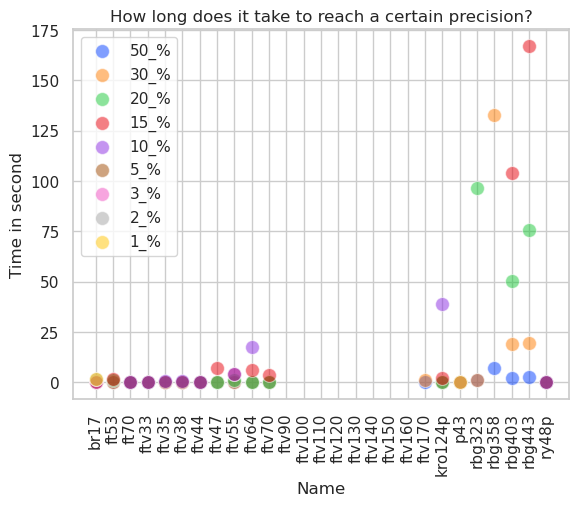

In [6]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df.columns[3:]):
    sns.scatterplot(data=df, x='Name', y=col, s=100, alpha=0.5, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Time in second')
plt.title("How long does it take to reach a certain precision?")
plt.legend()
# rotate the x labels
plt.xticks(rotation=90)

# show the plot
plt.show()

In [7]:
# full dataframe with no NaNs
# df = pd.merge(df_merged, df, on=['Name', 'best_known_sol'], how='inner')

In [8]:
print(df_merged)

       Name  best_known_sol    3_min  2.5_min    2_min  1.5_min    1_min  \
0      br17              39     39.0     39.0     39.0     39.0     39.0   
1      ft53            6905   7937.0   7937.0   7937.0   7937.0   7937.0   
2      ft70           38673  40708.0  40708.0  40708.0  40708.0  40708.0   
3     ftv33            1286   1382.0   1382.0   1382.0   1382.0   1382.0   
4     ftv35            1473   1555.0   1555.0   1555.0   1555.0   1555.0   
5     ftv38            1530   1618.0   1618.0   1618.0   1618.0   1618.0   
6     ftv44            1613   1768.0   1768.0   1768.0   1768.0   1768.0   
7     ftv47            1776   2041.0   2041.0   2041.0   2041.0   2041.0   
8     ftv55            1608   1758.0   1758.0   1758.0   1758.0   1758.0   
9     ftv64            1839   1974.0   1974.0   1974.0   1974.0   1974.0   
10    ftv70            1950   2216.0   2216.0   2216.0   2216.0   2216.0   
19   ftv170            2755   3428.0   3428.0   3428.0   3428.0   3430.0   
20  kro124p 

In [101]:
# calculating percent above best known solution
for col in df_merged.columns[2:]:
    df_merged[col] = 100 * (df_merged[col] - df_merged['best_known_sol']) / df_merged['best_known_sol']

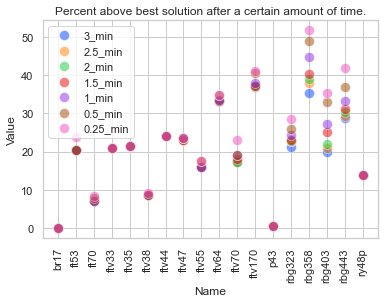

In [102]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df_merged.columns[2:]):
    sns.scatterplot(data=df_merged, x='Name', y=col, s=100, alpha=0.5, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Value')
plt.legend()
plt.title("Percent above best solution after a certain amount of time.")
# rotate the x labels
plt.xticks(rotation=90)

# show the plot
plt.show()

